### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


### 2. Load and merge data

In [2]:
os.chdir('..')

In [1]:
excel= pd.ExcelFile('Data/fbref_db.xlsx')
data= [pd.read_excel(excel, sheet_name= sheet) for sheet in excel.sheet_names]
data= pd.concat(data)

NameError: name 'pd' is not defined

### 3. Data profiling

#### a. List of parameters

In [36]:
parameters_list= list(data.columns)
parameters_list

['Rk',
 'Squad',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'Pts',
 'Pts/MP',
 'xG',
 'xGA',
 'xGD',
 'xGD/90',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes',
 "('Home', 'MP')",
 "('Home', 'W')",
 "('Home', 'D')",
 "('Home', 'L')",
 "('Home', 'GF')",
 "('Home', 'GA')",
 "('Home', 'GD')",
 "('Home', 'Pts')",
 "('Home', 'Pts/MP')",
 "('Home', 'xG')",
 "('Home', 'xGA')",
 "('Home', 'xGD')",
 "('Home', 'xGD/90')",
 "('Away', 'MP')",
 "('Away', 'W')",
 "('Away', 'D')",
 "('Away', 'L')",
 "('Away', 'GF')",
 "('Away', 'GA')",
 "('Away', 'GD')",
 "('Away', 'Pts')",
 "('Away', 'Pts/MP')",
 "('Away', 'xG')",
 "('Away', 'xGA')",
 "('Away', 'xGD')",
 "('Away', 'xGD/90')",
 '# Pl',
 'Age',
 'Poss',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'npxG',
 'xAG',
 'npxG+xAG',
 'PrgC',
 'PrgP',
 'G+A-PK',
 'xG+xAG',
 'GA90',
 'SoTA',
 'Saves',
 'Save%',
 'CS',
 'CS%',
 'PKA',
 'PKsv',
 'PKm',
 'FK',
 'CK',
 'OG',
 'PSxG',
 'PSxG/SoT',
 '

#### b. Shape of data

In [29]:
data_shape= pd.DataFrame([list(data.shape)],columns=['Records', 'Columns'])
data_shape

,Records,Columns
0,684,182


#### c. Number of unique teams

In [34]:
unique_teams= pd.DataFrame([data['Squad'].nunique()], columns= ['UniqueTeams'])
unique_teams

,UniqueTeams
0,145


#### d. Data profile of basic statistics

In [59]:
basic_statistics= round(data[['Pts','W', 'L', 'D', 'GF', 'GA','xG']].describe(),2)
basic_statistics

,Pts,W,L,D,GF,GA,xG
count,684.00,684.00,684.00,684.00,684.00,684.00,684.00
mean,50.61,13.78,13.78,9.30,51.37,51.37,49.89
std,17.29,6.08,5.49,2.94,17.01,13.32,12.51
min,13.00,2.00,0.00,2.00,20.00,20.00,26.30
25%,38.75,9.00,10.00,7.00,39.00,42.75,40.50
50%,48.00,13.00,14.00,9.00,48.00,51.00,47.65
75%,62.00,18.00,17.00,11.00,61.00,59.00,56.10
max,100.00,32.00,29.00,19.00,108.00,104.00,92.00


##### Corelation of basic stats with Rk

/var/folders/lg/dqrfsgd11p1bnm82y9g576380000gn/T/ipykernel_52653/3497507114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rk_corr.index, y=rk_corr.values, palette='coolwarm')


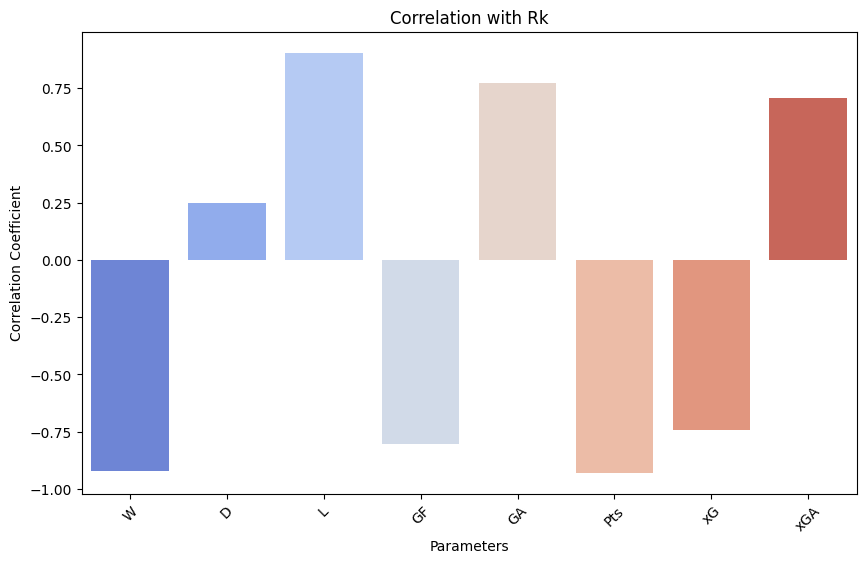

In [16]:
matrix= data[['W','D','L','GF','GA','Pts','xG','xGA','Rk']]
corr_matrix= matrix.corr()
rk_corr = corr_matrix['Rk'].drop('Rk')
plt.figure(figsize=(10, 6))
sns.barplot(x=rk_corr.index, y=rk_corr.values, palette='coolwarm')
plt.title('Correlation with Rk')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Parameters')
plt.xticks(rotation=45)
plt.show()

#### e. Categories list

In [67]:
categories=[]
for column in data.columns:
    if data[column].nunique() <9:
        categories.append(column)

categories


['MP',
 "('Home', 'MP')",
 "('Away', 'MP')",
 'Starts',
 'Min',
 '90s',
 'PKsv',
 'PKm',
 'FK',
 'OG',
 'Mn/MP',
 'Min%',
 '2CrdY']

#### f. Missing values

In [39]:
missing_values_list= [data[parameter][data[parameter].isna()].count() for parameter in data.columns]
missing_values= pd.DataFrame([missing_values_list],columns= data.columns).transpose()
missing_values.columns= ['MissingValueCount']
missing_values= missing_values[missing_values['MissingValueCount']!=0]
missing_values




,MissingValueCount


#### g. Uniqueness

In [87]:
unique_counts= data.nunique()
mask= unique_counts>400
granular_paras= data.loc[:,mask]
granular_paras.nunique()

xGD                442
Attendance         622
Top Team Scorer    656
npxG+xAG           441
PrgC               413
PrgP               512
Att                451
Att (GK)           420
Launch%            405
TotDist            684
PrgDist            679
1/3                457
Live               663
SCA90              421
Touches            662
Def Pen            493
Att Pen            419
Carries            661
Rec                666
PrgR               523
xG+/-              442
Recov              425
dtype: int64

#### h. Correlation matrix of non basic stats correlated with Rk

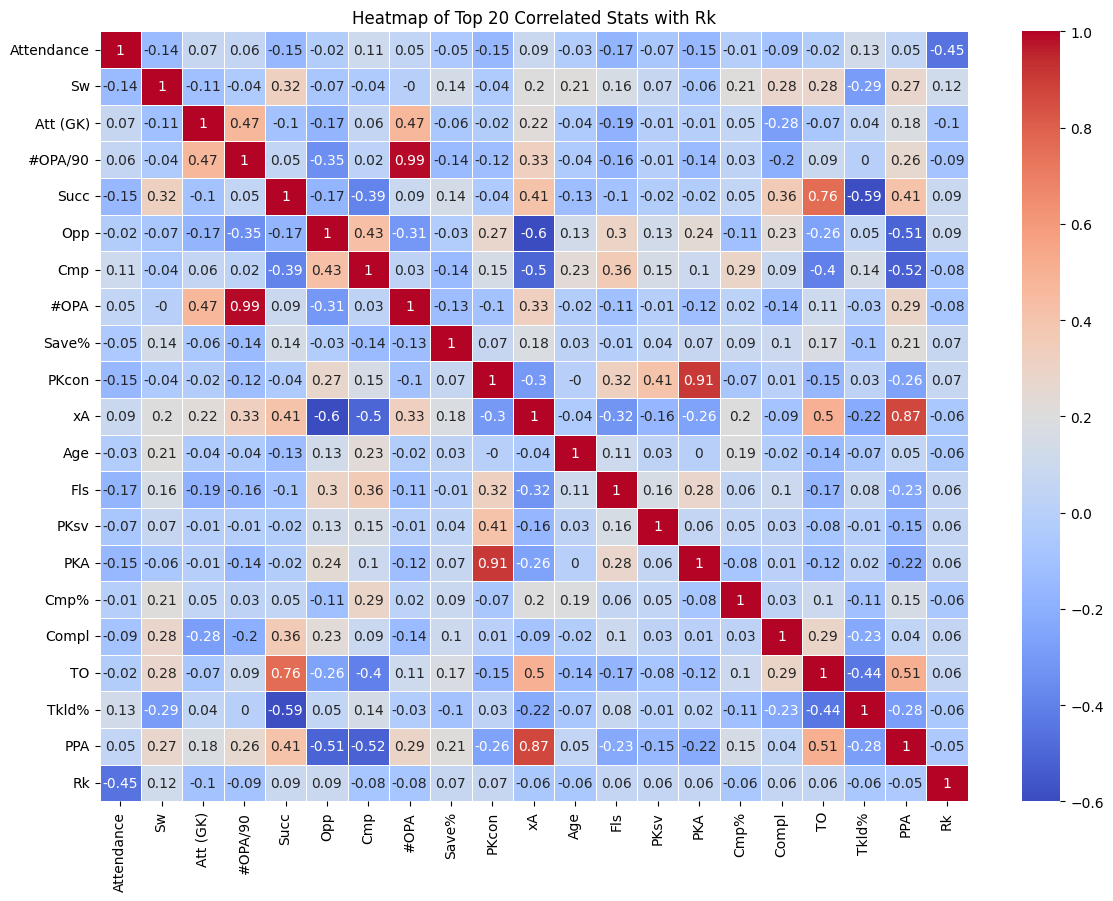

In [24]:
exclude_substrings = ['Pts', 'W', 'L', 'D', 'GF', 'GA', 'xG', 'MP']
non_basic_stats = [col for col in data.columns if not any(sub in str(col) for sub in exclude_substrings) and not isinstance(col, tuple)]
data_numeric= data[non_basic_stats]
data_numeric = data_numeric.select_dtypes(include=[int, float])
correlation_matrix = round(data_numeric.corr(),2)

# Wybór top 20 kolumn najbardziej skorelowanych z Rk
top_20_stats = list(correlation_matrix['Rk'].abs().sort_values(ascending=False).index[1:21])+['Rk']

# Tworzenie wykresu cieplnego korelacji
plt.figure(figsize=(14, 10))
sns.heatmap(round(data[top_20_stats].corr(),2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Top 20 Correlated Stats with Rk')
plt.show()

#### i. Mean, median, std dev of 20 most correlated statistics.

In [57]:
measures= data[top_20_stats]
normalized_data = (measures - measures.min()) / (measures.max() - measures.min())
measures_df= normalized_data.describe().transpose()
measures_df['std/mean']= measures_df['std']/measures_df['mean']

In [58]:
measures_df



,count,mean,std,min,25%,50%,75%,max,std/mean
Attendance,651.0,0.317734,0.222536,0.0,0.152061,0.273840,0.462364,1.0,0.700383
Sw,684.0,0.261114,0.139153,0.0,0.164179,0.243781,0.343284,1.0,0.532922
Att (GK),684.0,0.343610,0.139506,0.0,0.247551,0.327430,0.422005,1.0,0.406001
#OPA/90,684.0,0.247834,0.139354,0.0,0.144092,0.227666,0.311239,1.0,0.562288
Succ,684.0,0.341401,0.157844,0.0,0.230562,0.332613,0.431965,1.0,0.462342
Opp,684.0,0.438484,0.142671,0.0,0.345336,0.446809,0.538462,1.0,0.325374
Cmp,684.0,0.321533,0.153564,0.0,0.209302,0.302326,0.412791,1.0,0.477599
#OPA,684.0,0.273169,0.149396,0.0,0.169492,0.245763,0.347458,1.0,0.546899
Save%,684.0,0.575986,0.154137,0.0,0.470968,0.580645,0.681452,1.0,0.267606
PKcon,684.0,0.375914,0.170080,0.0,0.250000,0.375000,0.500000,1.0,0.452444


#### j. Boxplot of 20 most correlated statistics

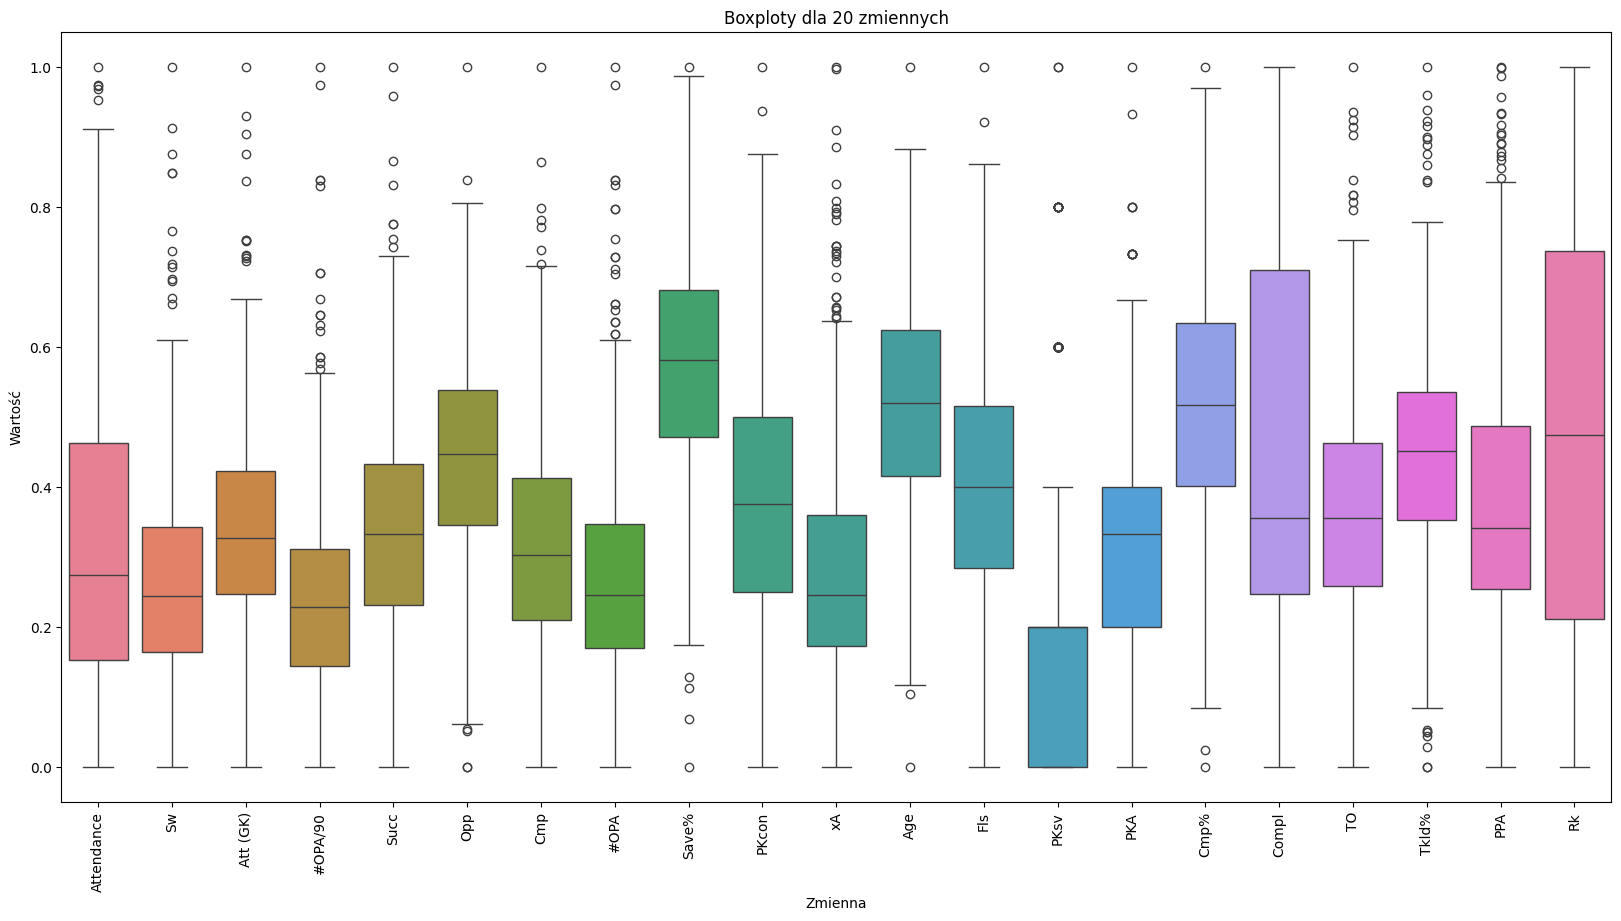

In [63]:

plt.figure(figsize=(20, 10))

sns.boxplot(data=normalized_data)

plt.title('Boxploty dla 20 zmiennych')
plt.xticks(rotation=90)  
plt.xlabel('Zmienna')
plt.ylabel('Wartość')

plt.show()


#### k. Histogram of 20 most correlated statistics

<Figure size 2000x1500 with 0 Axes>

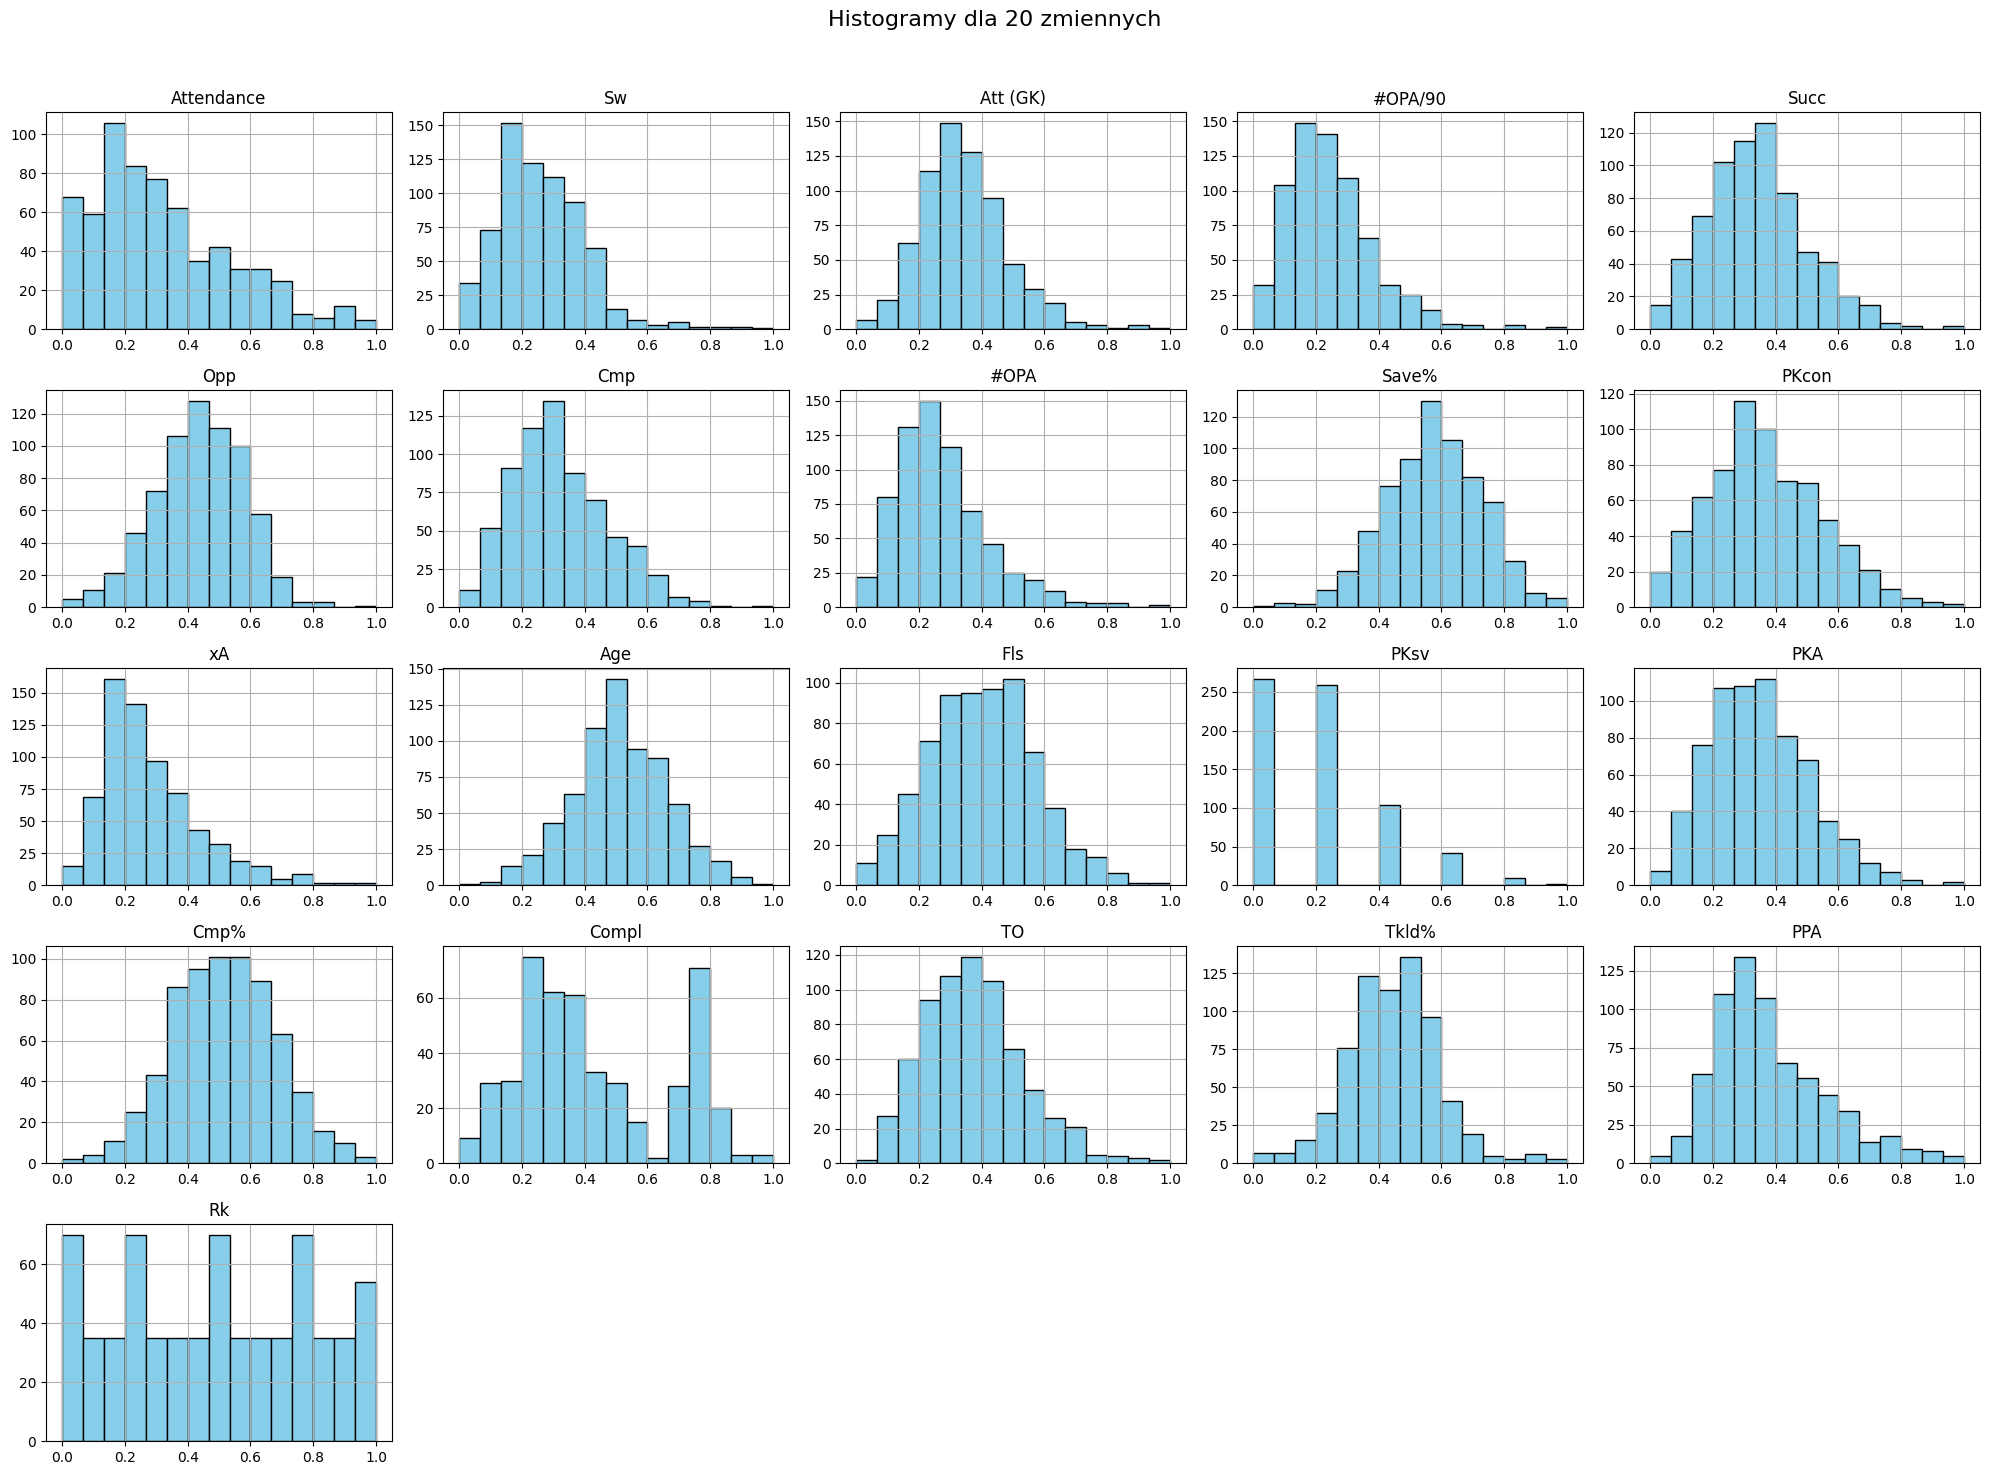

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładając, że masz już DataFrame o nazwie df

# Ustawienie rozmiaru wykresu, aby zmieścić 20 histogramów
plt.figure(figsize=(20, 15))

# Tworzenie histogramów dla wszystkich kolumn w DataFrame
normalized_data.hist(bins=15, layout=(5, 5), figsize=(20, 15), color='skyblue', edgecolor='black')

# Dodanie tytułu do całego wykresu
plt.suptitle('Histogramy dla 20 zmiennych', fontsize=16)

# Wyświetlenie wykresu
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
